<a href="https://colab.research.google.com/github/gitmystuff/DTSC5502/blob/main/Module_12/Module_12_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 12 Acivity

by Your Name

## Getting Started


* Colab - get notebook from gitmystuff DTSC5502 repository
* Save a Copy in Drive
* Remove Copy of
* Submit shared link in Canvas

## Overview

* Gradient Descent
* Neural Nets
* Learning
* Pytorch

## Learning (.docx)

* https://youtu.be/eX1y7o5Fu1Y?si=_2diOlIgJUcw0Pzb

## Gradient Descent

Andrew Ng, from https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN:

* $h_{\theta}(x) = \theta_0 + \theta_1x$
* where $\theta_0$ and $\theta_1$ are parameters
* and h is the hypothesis

### Machine Learning and the Matrix

* Machine learning uses matrices
* To find the parameters of our equation we can use **np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)**
* Where X has a bias (we added a bias to our OLS models back in our talk on regression)
* When we were exploring regression we were introduced to several analytical methods such as $y=\alpha + \beta{X} + e$
* and $\beta = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum(x - \bar{x})^2}$
* where $\alpha = \bar{y} - \beta \bar{X}$
* This can overwhelm a machine computing abilities if X is too large
* So we use gradient descent to incrementally find our parameters ($\theta s$)

### Gradient

An increase or decrease in the magnitude of a property (e.g. temperature, pressure, or concentration) observed in passing from one point or moment to another.

a= 0.4 b= 0.8
x values: [1 2 3 4 5]
y values: [1 3 2 3 5]
predicted values: [1.2, 2.0, 2.8, 3.6, 4.4]


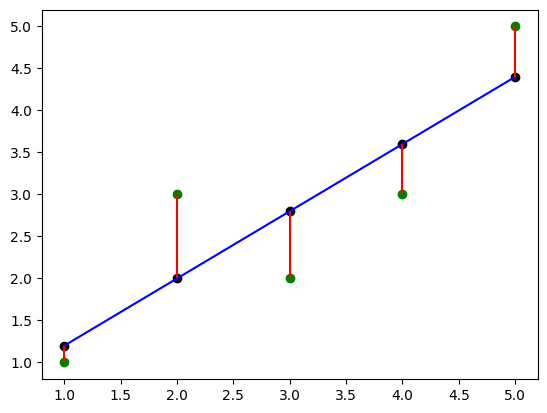

In [1]:
# plot x, y coordinates
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

# create basic scatterplot
plt.plot(x, y, 'go',)

# obtain a and b of linear regression line
b, a = np.polyfit(x, y, 1)
print('a=', a.round(1), 'b=', b.round(1))

# predicted values
y_hat = [round(a + (b*x), 2) for x in x]
print(f'x values: {x}')
print(f'y values: {y}')
print(f'predicted values: {y_hat}')
plt.plot(x, y_hat, 'ko')

# add linear regression line to scatterplot
plt.plot(x, a+b*x, 'b')

# ax.vlines(x,y,y)
plt.vlines(x, y, a+b*x, 'r')

plt.show()

In [2]:
# sum of y - yhat

###  MSE

$\frac{1}{n}\sum(y-\hat{y})^2$

In [3]:
# y = x^2

### The Calculus

The study of how things change; functions, limits, derivatives, etc

SymPy is an open-source Python library for symbolic computation. It provides computer algebra capabilities either as a standalone application, as a library to other applications, or live on the web as SymPy Live or SymPy Gamma.

https://www.sympy.org/en/index.html

#### Limits

* Function must be a 1:1 mapping
* Calculus is about rates of change, or the study of continuous change; derivatives
* $\lim\limits_{x \to \alpha} f(x) = L$; the limit of f of x as it approaches some value $\alpha$ is L
* L is the same as the function value
* Limit must approach something
* https://machinelearningmastery.com/a-gentle-introduction-to-limits-and-continuity/

Limits help us understand what a function approaches as the input gets closer to a certain value, even when the function is undefined at that point.

https://www.khanacademy.org/math/ap-calculus-ab/ab-limits-new/ab-1-2/v/introduction-to-limits-hd

#### Approaching Indeterminacy

* https://www.mathsisfun.com/calculus/limits.html

#### Getting Both Sides of $\alpha$

* $\lim\limits_{x \to \alpha^-} f(x) = L^-$
* $\lim\limits_{x \to \alpha^+} f(x) = L^+$

#### Division by Zero

Dividing be 0 is undefined - this is what could happen

<img src='https://www.mathsisfun.com/numbers/images/divide-by-zero.jpg' alt='a bottomless pit' />

https://www.mathsisfun.com/numbers/dividing-by-zero.html

In [4]:
# symbolic mathematics f=1/x


In [5]:
# plot 1/x

$ \lim\limits_{x \to 0} \frac{sin(x)}{x} = 1$

In [6]:
# plot sin(x)/x

#### Asymptotes and Infinities

* A line that continually approaches a given curve but does not meet it at any finite distance
* In analytic geometry, an asymptote of a curve is a line such that the distance between the curve and the line approaches zero as one or both of the x or y coordinates tends to infinity. In projective geometry and related contexts, **an asymptote of a curve is a line which is tangent to the curve at a point at infinity**. https://en.wikipedia.org/wiki/Asymptote
* $ \lim\limits_{x \to \infty} \frac{1}{x} = 0$

In [7]:
# limit of x approaching infinity

In [8]:
# limit of x approaching 0

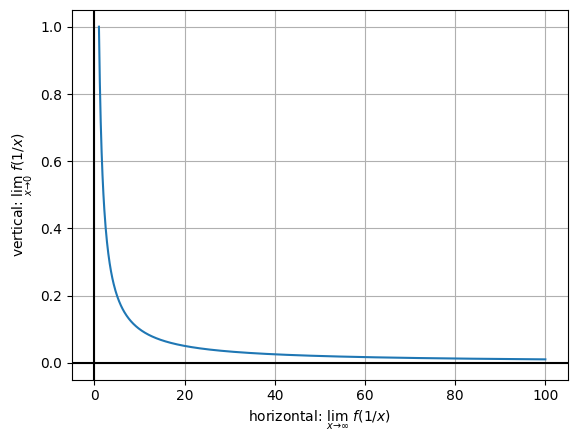

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 100, 1000)
y = 1 / x
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)
plt.xlabel(r'horizontal: $\lim_{x \to \infty} \  f(1/x) $')
plt.ylabel(r'vertical: $\lim_{x \to 0} \  f(1/x) $')
plt.show()

#### Indeterminate Forms

* In calculus and other branches of mathematical analysis, limits involving an algebraic combination of functions in an independent variable may often be evaluated by replacing these functions by their limits; if the expression obtained after this substitution does not provide sufficient information to determine the original limit, then the expression is called an indeterminate form. htts://en.wikipedia.org/wiki/Indeterminate_form
* $\lim\limits_{x \to \infty} (1 + \frac{1}{x})  = 1 + \frac{1}{\infty} = 1^{\infty} = e$ or ($1 + \frac{1}{n!}$)
* Euler's number helps explain exponential growth and was discovered by Bernoulli
* $\lim\limits_{x \to 1} \frac{x^2 - 1}{x - 1} = 2$
* But, when x = 1 we have 0 / 0
* The closer we get to 1 the closer we get to 2

In [10]:
# approaching 1

#### The Derivative

#### Slopes, Tangent Lines, Differentials, and Derivatives

* When we have a function such as $f(x) = x^2$ we can find the slope, at any point, of this function by getting the derivative
* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The derivative of a function is the rate of change of the output value with respect to its input value, whereas differential is the actual change of function.

#### Partial Derivative

In mathematics, a partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant (as opposed to the total derivative, in which all variables are allowed to vary). Partial derivatives are used in vector calculus and differential geometry.

https://en.wikipedia.org/wiki/Partial_derivative

* We find the derivative of a function using the Power Rule
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The partial derivative of $f(x, y) = x^2 + y^3$ is $f'(x) = 2x + 0 = 2x$
* In this case we find the partial derivative with respect to x and hold y as a constant
* The derivative of a constant is 0

https://www.mathsisfun.com/calculus/derivatives-partial.html

* Our function is $y = x^2$
* Our derivative is $\frac{dy}{dx} = 2x$, a new function that defines our slope
* Negative numbers vs Positive numbers trying to get to the minimum



In [11]:
# f(x^2)

#### The Tangent

A straight line or plane that touches a curve or curved surface at a point, but if extended does not cross it at that point.

$m = \lim\limits_{x \to \alpha} \frac{f(x) - f(a)}{x - a}$

### Alternative Equation

$m = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$

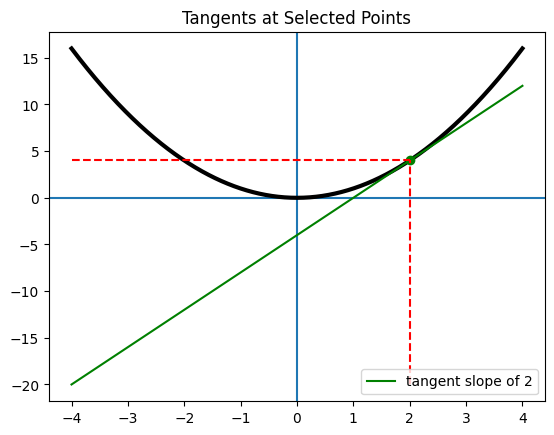

In [12]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')
plt.plot(x0, y0, marker='o', color='green', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='tangent slope of 2')
plt.hlines(y=4, xmin=-4, xmax=2, color='r', ls='dashed')
plt.vlines(x=2, ymin=-20, ymax=4, color='r', ls='dashed')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

In [13]:
# intercept slope
import numpy as np
from scipy import interpolate
from scipy.stats import linregress

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

# get the coefficients using linregress

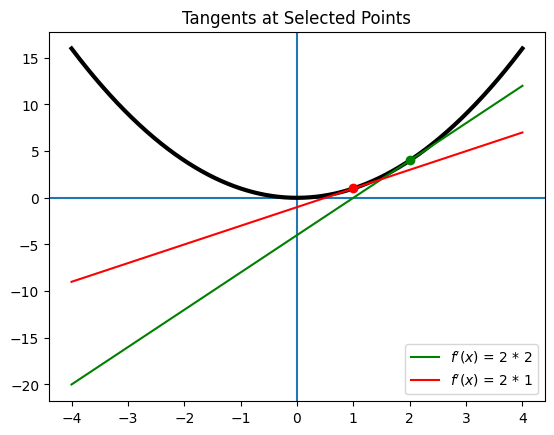

In [14]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 2
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

x1 = 1
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')
# plt.plot(x0, y0, marker='o', color='green', markerfacecolor='none', markeredgewidth=1)
plt.plot(x0, y0, marker='o', color='green', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label=r'$f^\prime(x)$ = 2 * 2')

plt.plot(x1, y1, marker='o', color='red', markeredgewidth=1)
plt.plot(x, tngnt1(x), 'r-', label=r'$f^\prime(x)$ = 2 * 1')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

In [15]:
# intercept slope
from scipy.stats import linregress
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x1 = 1
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

# get the coefficients using linregress


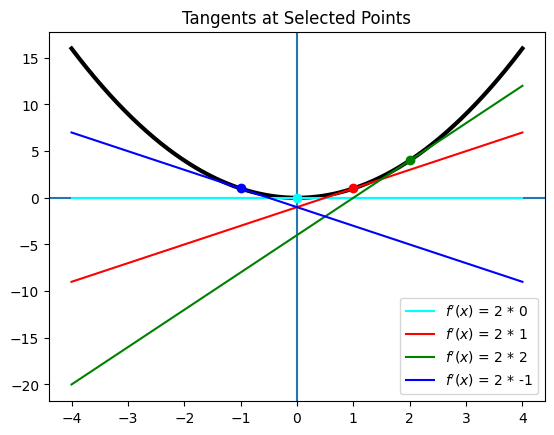

In [16]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x2 = 2
y2 = interpolate.splev(x2, tck)
dydx2 = interpolate.splev(x2, tck, der=1)
tngnt2 = lambda x: dydx2*x + (y2-dydx2*x2)

x1 = 1
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

x0 = 0
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

xn1 = -1
yn1 = interpolate.splev(xn1, tck)
dydxn1 = interpolate.splev(xn1, tck, der=1)
tngntn1 = lambda x: dydxn1*x + (yn1-dydxn1*xn1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=3, color='black')

plt.plot(x0, y0, marker='o', color='cyan', markeredgewidth=1)
plt.plot(x, tngnt0(x), color='cyan', label=r'$f^\prime(x)$ = 2 * 0')

plt.plot(x1, y1, marker='o', color='red', markeredgewidth=1)
plt.plot(x, tngnt1(x), 'r-', label=r'$f^\prime(x)$ = 2 * 1')

plt.plot(x2, y2, marker='o', color='green', markeredgewidth=1)
plt.plot(x, tngnt2(x), 'g-', label=r'$f^\prime(x)$ = 2 * 2')

plt.plot(xn1, yn1, marker='o', color='blue', markeredgewidth=1)
plt.plot(x, tngntn1(x), 'b-', label=r'$f^\prime(x)$ = 2 * -1')

plt.legend()
plt.title(f'Tangents at Selected Points')
plt.show()

#### The Slope

* m = rise/run
* $\frac{\Delta(y)}{\Delta(x)}$
* $\frac{y_2 - y_1}{x_2 - x_1}$
* Intuitively, to find the tangent at $\alpha$ we just move our two points closer and closer

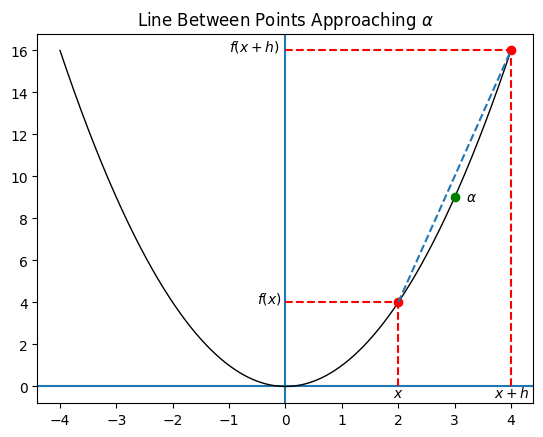

In [17]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 4
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

x1 = 2
y1 = interpolate.splev(x1, tck)
dydx1 = interpolate.splev(x1, tck, der=1)
tngnt1 = lambda x: dydx1*x + (y1-dydx1*x1)

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=1, color='black')
plt.plot(x0, y0, marker='o', color='red', markeredgewidth=1)
plt.plot(x1, y1, marker='o', color='red', markeredgewidth=1)
plt.plot(3, 9, marker='o', color='green', markeredgewidth=1)
plt.text(3.2, 8.8, r'$\alpha$')

point1 = [2, 4]
point2 = [4, 16]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle = '--')

plt.hlines(y=4, xmin=0, xmax=2, color='r', ls='dashed')
plt.vlines(x=2, ymin=0, ymax=4, color='r', ls='dashed')
plt.hlines(y=16, xmin=0, xmax=4, color='r', ls='dashed')
plt.vlines(x=4, ymin=0, ymax=16, color='r', ls='dashed')

plt.text(1.9, -0.5, r'$x$')
plt.text(3.7, -0.5, r'$x + h$')

plt.text(-0.5, 4, r'$f(x)$')
plt.text(-1, 16, r'$f(x + h)$')


plt.title(r'Line Between Points Approaching $\alpha$')
plt.show()

* The derivative is the slope
* The derivative of a function f at $\alpha$ is $f'(\alpha) = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$
* You may see $f'(\alpha) = \lim\limits_{h \to \alpha} \frac{f(x) - f(a)}{x - a}$
* Expressed as a function: $f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}$
* If f is differentiable at $\alpha$, then f is continuous at $\alpha$
* Differentiable means we can get a derivative (not everything is differentiable)
* $\Delta{x} \to dx$ is the infinitesimal distance
* dx is the infinitesimal change in x. Delta x means a bigger change in x, in the sense the change in x over an interval. It is the difference between two values of x. https://www.quora.com/What-is-the-difference-between-dx-and-Delta-x

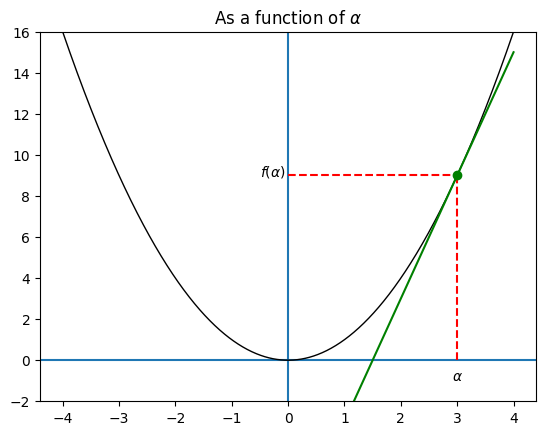

In [18]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2
tck = interpolate.splrep(x, y)

x0 = 3
y0 = interpolate.splev(x0, tck)
dydx0 = interpolate.splev(x0, tck, der=1)
tngnt0 = lambda x: dydx0*x + (y0-dydx0*x0)

plt.axhline(0)
plt.axvline(0)

plt.plot(x, y, linewidth=1, color='black')
plt.hlines(y=9, xmin=0, xmax=3, color='r', ls='dashed')
plt.vlines(x=3, ymin=0, ymax=9, color='r', ls='dashed')

plt.plot(x0, y0, marker='o', color='green', markeredgewidth=1)
plt.plot(x, tngnt0(x), 'g-', label='tangent of 2')

plt.text(-0.5, 9, r'$f(\alpha)$')
plt.text(2.9, -1, r'$\alpha$')

plt.ylim(-2, 16)

plt.title(r'As a function of $\alpha$')
plt.show()

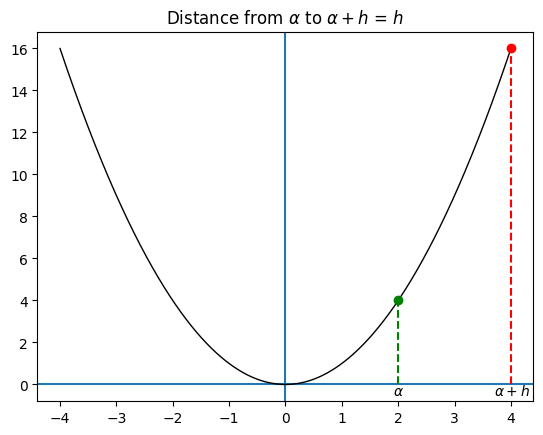

In [19]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-4, 4, 1000)
y = x**2

plt.axhline(0)
plt.axvline(0)
plt.plot(x, y, linewidth=1, color='black')
plt.plot(2, 4, marker='o', color='green', markeredgewidth=1)
plt.plot(4, 16, marker='o', color='red', markeredgewidth=1)

plt.vlines(x=2, ymin=0, ymax=4, color='g', ls='dashed')
plt.vlines(x=4, ymin=0, ymax=16, color='r', ls='dashed')

plt.text(1.9, -0.5, r'$\alpha$')
plt.text(3.7, -0.5, r'$\alpha + h$')

plt.title(r'Distance from $\alpha$ to $\alpha + h$ = $h$')
plt.show()

* $m = \lim\limits_{h \to 0} \frac{f(a + h) - f(h)}{h}$
* a + h - a = h

#### The Proof

$f(x) = x^2$, find $f'(x)$

* $f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}$
* $= \lim\limits_{h \to 0} \frac{(x + h)^2 - x^2}{h}$
* $= \lim\limits_{h \to 0} \frac{x^2 + 2xh + h^2 - x^2}{h}$
* $= \lim\limits_{h \to 0} \frac{2xh + h^2}{h}$
* $= \lim\limits_{h \to 0} 2x + h$
* $= \lim\limits_{h \to 0} 2x$
* $\frac{d}{dx}(x^2) = 2x$
* If $y=x^2$ then $\frac{dy}{dx} = 2x$

#### The Power Rule

* We find the derivative of a function using the Power Rule
* $\frac{d}{dx}(x^r) = rx^{r-1}$
* The derivative of $f(x) = x^2$ is $f'(x) = 2x$
* The partial derivative of $f(x, y) = x^2 + y^3$ is $f'(x) = 2x + 0 = 2x$
* In this case we find the partial derivative with respect to x and hold y as a constant
* The derivative of a constant is 0

https://www.mathsisfun.com/calculus/derivatives-partial.html

### MSE as Cost, Loss, Objective, etc Function

* MSE = $\frac{1}{n}\sum(y - \hat{y})^2$



#### The Loss Function

* Here is our challenge: $min J(\theta_0, \theta_1)$ where $J(\theta_0, \theta_1)$ is our cost function
* Start with some $\theta_0, \theta_1$
* Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ until we hopefully end up with a minimum (Andrew Ng)
* Since this is an incremental learning process we call these increments the learning rate, or $\alpha$

#### Minimize $J(\theta_0, \theta_1)$

* $\frac{1}{2m}\sum(h_\theta(x) - y)^2$
* $\frac{\partial}{\partial\theta_0} * \frac{1}{m}\sum(h_\theta(x) - y)$
* $\frac{\partial}{\partial\theta_1} * \frac{1}{m}\sum(h_\theta(x) - y)x$
* given $h_{\theta}(x) = \theta_0 + \theta_1x$

#### Our Final Formula

* $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$
* where := is an assignment operator vs equality operator
* and $\theta_0, \theta_1$ is updated simultaneously
* and $\alpha$ is the learning rate
* and the $\partial$ is the partial derivative
* We repeat $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$ until convergence

#### Parabola

In [20]:
# plot x^2 with some reference points



#### Slope

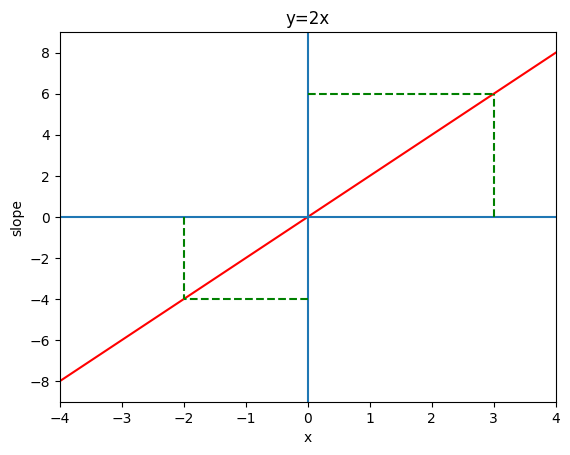

In [21]:
# our slope, y = 2x
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 100)
y = 2*x
plt.plot(x, y, '-r')
plt.axhline(0)
plt.axvline(0)
plt.hlines(y=-4, xmin=0, xmax=-2, color='g', ls='dashed')
plt.vlines(x=-2, ymin=0, ymax=-4, color='g', ls='dashed')
plt.hlines(y=6, xmin=0, xmax=3, color='g', ls='dashed')
plt.vlines(x=3, ymin=0, ymax=6, color='g', ls='dashed')
plt.title('y=2x')
plt.xlabel('x')
plt.ylabel('slope')
plt.xlim(-4, 4)
plt.ylim(-9, 9)
plt.show()

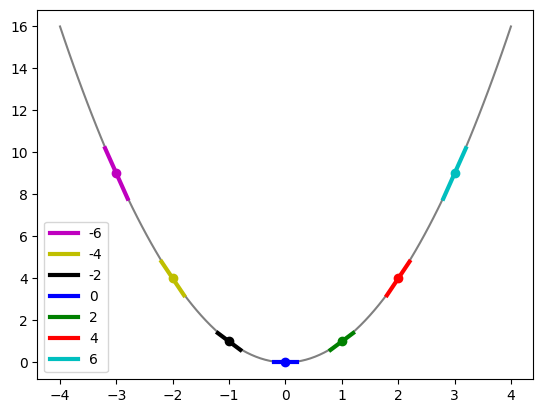

In [22]:
# https://stackoverflow.com/questions/54961306/how-to-plot-the-slope-tangent-line-of-parabola-at-any-point
import numpy as np
import matplotlib.pyplot as plt

def slope(x):
    return 2*x

def point_slope(x, x1, y1): # y = m(x1) * (x-x1) + y1 vs y - y1 = m(x - x1) where m is slope
    return slope(x1)*(x-x1)+y1 # y = mx + b

# A tangent line to the function f(x) at the point x=a is a line that just touches the graph of the function
# at the point in question and is “parallel” (in some way) to the graph at that point.
# https://tutorial.math.lamar.edu/classes/calci/tangents_rates.aspx

# x data
x = np.linspace(-4, 4, 100)

# colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# plot the parabola with slopes
plt.plot(x, x**2, color='gray')
for i in [-3, -2, -1, 0, 1, 2, 3]:
    line = np.linspace(i-0.2, i+0.2, 10)
    plt.plot(i, i**2, color=colors[i], marker='o', linewidth=10)
    plt.plot(line, point_slope(line, i, i**2), color=colors[i], linewidth=3, label=slope(i))

plt.legend();

In [23]:
from IPython.display import Image

Image(url='https://srdas.github.io/DLBook/DL_images/TNN1.png')

#### Learning Rate

In [24]:
from IPython.display import Image

Image(url='https://srdas.github.io/DLBook/DL_images/TNN2.png')

#### Convergence

Iteration 0: y = -0.21 + 3.98x and the cost: 1053.52
Iteration 10: y = -0.14 + 29.48x and the cost: 391.96
Iteration 20: y = 1.01 + 40.29x and the cost: 271.87
Iteration 30: y = 1.88 + 44.92x and the cost: 249.30
Iteration 110: y = 2.91 + 48.48x and the cost: 243.92
(By Formula: y = 2.91 + 48.48x and the cost: 243.92)


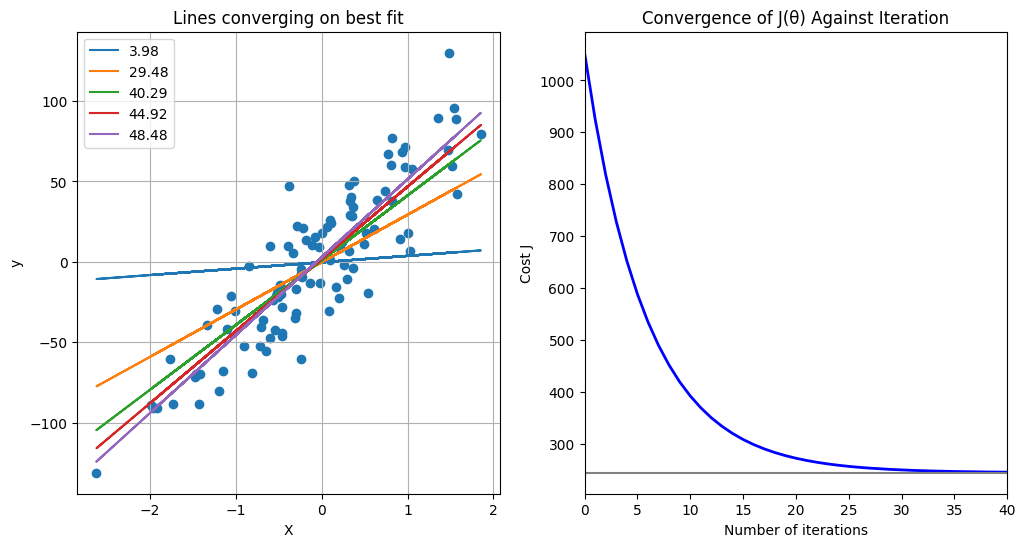

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

def cost_function(X, y, theta):
    # (Sum(h(x) - y)**2 / 2m)
    return ((X.dot(theta) - np.vstack(y.T)) ** 2).sum()/(2 * y.size)

def gradientDescent(X, y, theta, alpha, num_iters):
    # initialize values
    thetas = []
    J_history = np.zeros((num_iters, 1))
    j = 0

    for i in range(num_iters):
        # theta was initialized as [[0], [0]] (simultaneous computation)
        theta = theta - alpha*(1.0/X.shape[0]) * X.T.dot(X.dot(theta) - np.vstack(y.T))
        thetas.append(theta) # store thetas
        J_history[i] = cost_function(X, y, theta) # store cost (mse)

    return theta, thetas, J_history

# create X y dataset
X, y, coef = make_regression(n_samples = 100,
                             n_features = 1,
                             n_targets = 1,
                             noise = 25,
                             coef = True,
                             random_state = 42)

plt.figure(figsize=(12,6))
plt.subplot(121)

# scatterplot
plt.scatter(X, y)

# choose a learning rate
alpha = 0.1
num_iters = 1000

# reshape X and add bias
J = np.append(arr = np.ones((y.size, 1)).astype(int), values = X.reshape(y.size, 1), axis = 1)

# init weights and run gradient descent
theta=[[0], [0]]
theta, thetas, J_history = gradientDescent(J, y, theta, alpha, num_iters)

# plot converging lines
iteration = [0, 10, 20, 30, 110]
iteration_list = []
for i in iteration:
    iteration_list.append(thetas[i])
    print ('Iteration {}: y = {:0.2f} + {:0.2f}x and the cost: {:0.2f}'.format(i, thetas[i][0][0], thetas[i][1][0], J_history[i][0]))
    plt.plot(X, thetas[i][0] + thetas[i][1] * X, '-', label=thetas[i][1][0].round(2))

# line of best fit formula
b, a = np.polyfit(X.flatten(), y, 1)
print(f'(By Formula: y = {a.round(2)} + {b.round(2)}x and the cost: {cost_function(J, y, theta).round(2)})')
plt.grid(True)
plt.title('Lines converging on best fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend();

# Plot the convergence of J_history
plt.subplot(122)
plt.plot(range(J_history.size), J_history, "-b", linewidth=2)
plt.axhline(cost_function(J, y, theta).round(2), color='gray')
plt.title('Convergence of J(\u03B8) Against Iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.xlim((0, 40))
plt.show(block=False)

* Start with some $\theta_0, \theta_1$
* Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$, our cost function, until we hopefully end up with a minimum
* Since this is an incremental learning process we call these increments the learning rate, or $\alpha$
* theta = theta - alpha*(1.0/X.shape[0]) * X.T.dot(X.dot(theta) - np.vstack(y.T))
* Repeat $\theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta} J(\theta_0, \theta_1)$ until convergence
* Minimum has been achieved

## Learning

Tom Mitchell: A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

https://scitechdaily.com/mits-brain-breakthrough-decoding-how-human-learning-mirrors-ai-model-training/

### Supervised Learning

* Linear Regression
* Logistic Regression
* Decision Tree
* Random Forest

### Unsupervised Learning

* Clustering - See Clustering Notebook
* PCA (vs LDA) - See Dimensionality Notebook

### Semi-Supervised Learning

* Text Classification
* Speech Analysis
* Search Engines
* Fraud Detection

### Transfer Learning

* Parameters developed from one task transfered to another task
* Computer Vision Pre-Trained Models (ImageNet, VGG, ResNet, Inception, MobileNet)
* Network Anomaly Detection

### Reinforcement Learning

* States
* Actions
* Rewards (Reinforcement)
* Plans
* Policies
* Episodes
* Markov Decision Processes
* Bellman Equation
* (Deep) Q-Learning

### Deep Learning

Deep learning is the subset of machine learning methods which are based on artificial neural networks with representation learning. The adjective "deep" in deep learning refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.

https://en.wikipedia.org/wiki/Deep_learning

## Neural Nets

http://neuralnetworksanddeeplearning.com/

* Chains of logistic regressions

### Neurons

Neurons transmit information between each other through chemical and electrical signals via synapses thereby forming neural networks, a series of interconnected neurons. This is what is meant by “the wiring of the brain” and “neurons that fire together, wire together”

https://www.sparksaba.com/family-resources/brain-plasticity-amp-early-intervention-neurons-that-fire-together-wire-together

In [26]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Components_of_neuron.jpg/640px-Components_of_neuron.jpg')

By Jennifer Walinga - https://opentextbc.ca/introductiontopsychology/chapter/3-1-the-neuron-is-the-building-block-of-the-nervous-system/, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=97847412

Kinetic Chemical Distribution

In [27]:
# neuron for a single observation
from IPython.display import Image

Image(url='https://ml-cheatsheet.readthedocs.io/en/latest/_images/neuron.png')

* Taken from https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html
* A.K.A. Perceptron
* $S(\sum(xw) + b)$
* $f(x) = \frac{1}{1+e^{-x}}$

Example of Neural Net in PyTorch

<pre>
model_nn = torch.nn.Sequential(
    torch.nn.Linear(Inputs, Output),
    torch.nn.Sigmoid()
)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_nn.parameters())
</pre>

* Linear nn is a single layer feed forward net with n inputs and m output
* A loss function measures the difference between the predicted output of a model and the actual output, while an optimizer adjusts the model's parameters to minimize the loss function. https://medium.com/geekculture/loss-functions-and-optimizers-in-ml-models-b125871ff0dc
* Criterion - BCELoss (when to stop)
* Optimizer - Adam (update weights)


### Activation Functions

An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.

* https://www.v7labs.com/blog/neural-networks-activation-functions
* https://ml-explained.com/blog/activation-functions-explained
* https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb

#### The Sigmoid

$S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} = 1 - S(-x)$

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png' width='320px' alt='Sigmoid' />

Source: https://en.wikipedia.org/wiki/Sigmoid_function

Learn more:

* https://en.wikipedia.org/wiki/Sigmoid_function
* https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
* https://en.wikipedia.org/wiki/Activation_function

#### Rectified Linear Unit (ReLU)

$f(x) = max(0, x)$

In [28]:
# neuron for a single observation
from IPython.display import Image

Image(url='https://ailephant.com/wp-content/uploads/2018/08/ReLU-function-graph-300x234.png')

#### Softmax

Looks like Sigmoid

$P(y=j|x) = \frac{e^{x_j}}{\sum(e^{x_k})}$

<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/0*7RlvnsrgYmmjqeIF.png' width='640px' alt='softmax' />

Source: Applying Softmax Function to Model Output, by Sewade Ogun (https://ogunlao.github.io/2020/04/26/you_dont_really_know_softmax.html)

In [29]:
# the horse
import numpy as np

cat = (np.e**4/(np.e**4 + np.e**2 + np.e**8))
dog = (np.e**2/(np.e**4 + np.e**2 + np.e**8))
horse = (np.e**8/(np.e**4 + np.e**2 + np.e**8))
print(round(cat, 2), round(dog, 2), round(horse, 2))
print(cat + dog + horse)

0.02 0.0 0.98
1.0


#### Log Loss (Binary Cross-Entropy)

$L_{log} = -\frac{1}{N} \sum[(y) log(p(y)) + (1-y)log(1-p(y))]$


See https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb

#### Cross Entropy (Multi Class)

$L_{CE}=-\frac{1}{N}\sum\limits_{i=1}^{N}\sum\limits_{k=1}^{K}1\{y_i=k\}log(p(y_i=k))$

### Weights (Parameters)

Weight is the parameter within a neural network that transforms input data within the network's hidden layers. A neural network is a series of nodes, or neurons. Within each node is a set of inputs, weight, and a bias value. As an input enters the node, it gets multiplied by a weight value and the resulting output is either observed, or passed to the next layer in the neural network. Often the weights of a neural network are contained within the hidden layers of the network.

https://deepai.org/machine-learning-glossary-and-terms/weight-artificial-neural-network

### Optimizers

https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6

#### Stochastic Gradient Descent

* SGD updates weights per observation

#### Batch Gradient Descent

* Batch updates weights when all observations have been passed through the net

#### Adam

* Adaptive Moment Estimation - computes individual adaptive learning rates for different parameters
* Adam: A Method for Stochastic Optimization: https://arxiv.org/abs/1412.6980

### ANN (Artificial Neural Network)

* Artificial Neural Nets: Feature selection / extraction
* Output layer using softmax to provide probabilities for each label such as Setosa, Versicolor, Virginica
* Output shows probabilities for each label in the class (.3, .2, .5)
* As you go forward through more layers the level of abstraction increases

In [30]:
# a simple neural network featuring weights for an observation
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/330px-Neural_network_example.svg.png')

### Feed Forward

Only goes one direction, feed forward

<img src="https://editor.analyticsvidhya.com/uploads/9156011.png"></img>

### Backpropagation

<img src='https://miro.medium.com/v2/resize:fit:1100/format:webp/1*rLUL1hmN8E53lqGuei-jyw.png' width='640px' alt='backprobagaion' />

https://towardsdatascience.com/how-does-back-propagation-work-in-neural-networks-with-worked-example-bc59dfb97f48

### CNN (Convolutional Neural Network)

* Convolutional Neural Nets: Feature learning
* Convolutional neural networks are effective at document classification, namely because they are able to pick out salient features (e.g. tokens or sequences of tokens) in a way that is invariant to their position within the input sequences.
* Networks with convolutional and pooling layers are useful for classification tasks in which we expect to find strong local clues regarding class membership, but these clues can appear in different places in the input. […] We would like to learn that certain sequences of words are good indicators of the topic, and do not necessarily care where they appear in the document. Convolutional and pooling layers allow the model to learn to find such local indicators, regardless of their position.

Sources

* Gradient-Based Learning Applied to Document Recognition by Yann LeCun et al. (1998) http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf
* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
* https://machinelearningmastery.com/best-practices-document-classification-deep-learning/
* https://arxiv.org/abs/1510.00726


### RNN (Recurrent Neural Network)

* Recurrent Neural Nets: Feature propagation (memory) - the breeding of specimens of a plant or animal by natural processes from the parent stock
* Time series
* Sequential data

<img src='https://editor.analyticsvidhya.com/uploads/17464JywniHv.png' width='640px' alt='rnn' />

Source: https://www.analyticsvidhya.com/blog/2022/03/a-brief-overview-of-recurrent-neural-networks-rnn/

### LSTM (Long Short Term Memory)

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video).

https://en.wikipedia.org/wiki/Long_short-term_memory

* Unrolling/unfolding: output from t-1 goes into t, as well as input t, etc.
* Cells that are a function of inputs from previous steps are also know as memory cells
* Ft: Forget state, what memory can we discard based on sigmoid 0 to 1 (0, forget)
* It: What Information do we want to store in the cell state (Ct, tanh)
* Ot: Output to pass on to t+1

In [31]:
from IPython.display import Image

Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/640px-Long_Short-Term_Memory.svg.png')

## Pytorch

PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library. Torch is an open source ML library used for creating deep neural networks and is written in the Lua scripting language. It's one of the preferred platforms for deep learning research. The framework is built to speed up the process between research prototyping and deployment.

https://www.techtarget.com/searchenterpriseai/definition/PyTorch

### Linear Regression

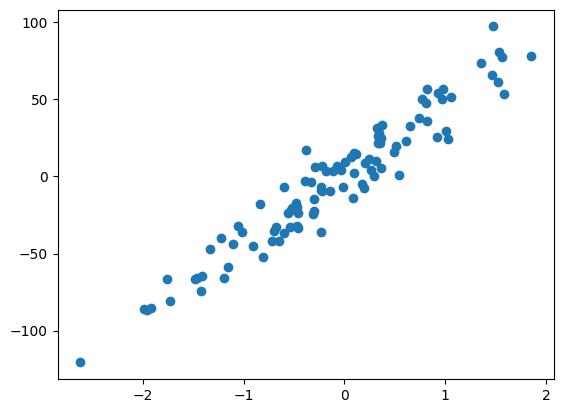

In [32]:
# create some data and plot it
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=13, random_state=42)
plt.scatter(X, y);

MSE: 188.66856452874399
[45.1403338] -0.518109210838408


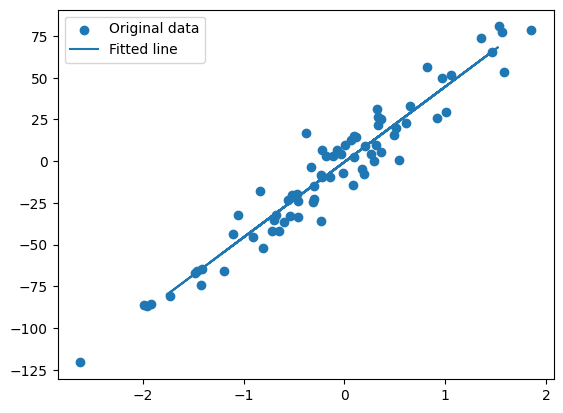

In [33]:
# sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=yhat)
print(f'MSE: {mse}')
w_lr = model.coef_
b_lr = model.intercept_
print(w_lr, b_lr)

plt.scatter(X_train, y_train, label='Original data')
plt.plot(X_test, yhat, label='Fitted line')
plt.legend()
plt.show()

Epoch 10/50, Loss: 460.3886
Epoch 20/50, Loss: 183.4362
Epoch 30/50, Loss: 131.5324
Epoch 40/50, Loss: 121.1686
Epoch 50/50, Loss: 119.0267

loss: tensor(119.0267, grad_fn=<MseLossBackward0>)
nn: [[44.407764]] [-0.86455774]

mse: 188.66856452874399
lr: [45.1403338] -0.518109210838408


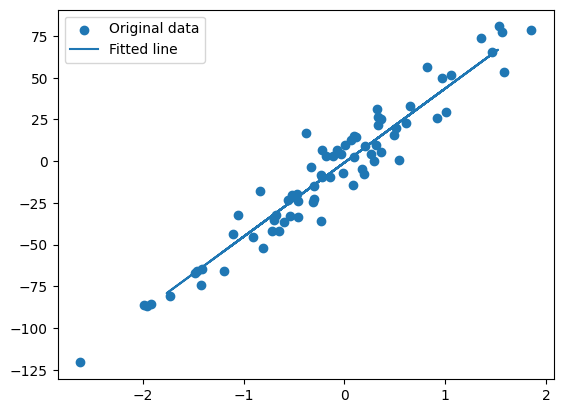

In [34]:
# neural net
import numpy as np
import torch

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

X_train_nn = torch.from_numpy(X_train.astype(np.float32))
y_train_nn = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
X_test_nn = torch.from_numpy(X_test.astype(np.float32))
y_test_nn = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

n_epochs = 50
losses = []

for epoch in range(n_epochs):
  # train and get loss
  outputs = model(X_train_nn)
  loss = criterion(outputs, y_train_nn)
  losses.append(loss.item())

  # reset gradient before backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 10 == 0:
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}')

print()
print('loss:', loss)
w_nn = model.weight.data.numpy()
b_nn = model.bias.data.numpy()
print('nn:', w_nn, b_nn)
print()
print('mse:', mse)
print('lr:', w_lr, b_lr)

yhat = model(X_test_nn).detach().numpy()
plt.scatter(X_train, y_train, label='Original data')
plt.plot(X_test, yhat, label='Fitted line')
plt.legend();

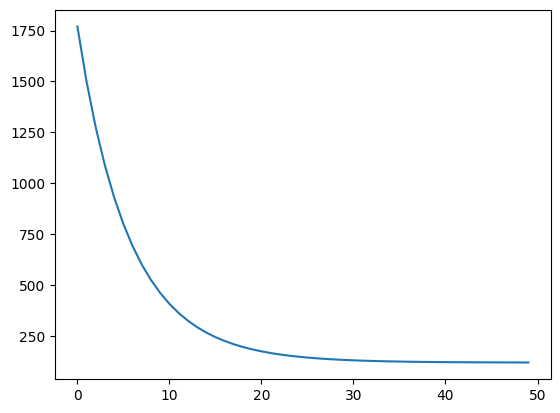

In [35]:
# plot losses
plt.plot(losses);

### Logistic Regression

In [36]:
# create some data and plot it
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200,
                                             n_features=2,
                                             n_informative=2,
                                             n_redundant=0,
                                             n_clusters_per_class=1,
                                             random_state=42)

In [37]:
# sklearn model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

train score: 0.84
test score: 0.88
[[24  6]
 [ 0 20]]


In [38]:
# neural net - Lazy Programmer PyTorch: Deep Learning and Artificial Intelligence
import numpy as np
import torch

N, D = X_train.shape

model_nn = torch.nn.Sequential(
    torch.nn.Linear(D, 1),
    torch.nn.Sigmoid()
)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_nn.parameters())

X_train_nn = torch.from_numpy(X_train.astype(np.float32))
X_test_nn = torch.from_numpy(X_test.astype(np.float32))
y_train_nn = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test_nn = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

n_epochs = 4000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
  outputs = model_nn(X_train_nn)
  loss = criterion(outputs, y_train_nn)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # test loss
  outputs_test = model_nn(X_test_nn)
  loss_test = criterion(outputs_test, y_test_nn)

  train_losses[epoch] = loss.item()
  test_losses[epoch] = loss_test.item()

  if (epoch + 1) % 500 == 0:
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

with torch.no_grad():
  p_train = model_nn(X_train_nn)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train_nn.numpy() == p_train)

  p_test = model_nn(X_test_nn)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test_nn.numpy() == p_test)

print()
print('train_nn score:', train_acc.round(2))
print('test-nn score:', test_acc)
print(confusion_matrix(y_test_nn, p_test))
print()

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))

Epoch 500/4000, Train Loss: 0.4517, Test Loss: 0.4506
Epoch 1000/4000, Train Loss: 0.4113, Test Loss: 0.3988
Epoch 1500/4000, Train Loss: 0.3942, Test Loss: 0.3727
Epoch 2000/4000, Train Loss: 0.3869, Test Loss: 0.3586
Epoch 2500/4000, Train Loss: 0.3840, Test Loss: 0.3507
Epoch 3000/4000, Train Loss: 0.3830, Test Loss: 0.3463
Epoch 3500/4000, Train Loss: 0.3827, Test Loss: 0.3439
Epoch 4000/4000, Train Loss: 0.3826, Test Loss: 0.3428

train_nn score: 0.84
test-nn score: 0.88
[[24  6]
 [ 0 20]]

train score: 0.84
test score: 0.88
[[24  6]
 [ 0 20]]


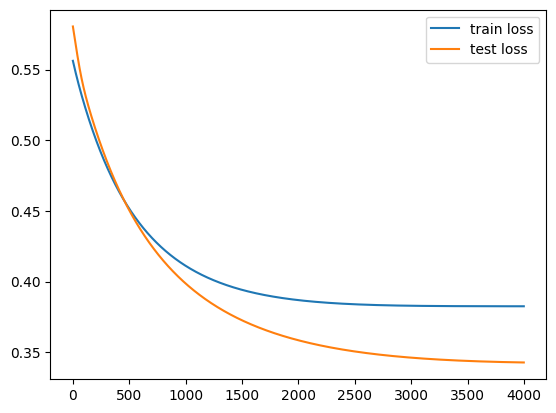

In [39]:
# plot losses
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

### Stock Returns